## Distance-based queries

In our spatial analysis, we might also be interested in populations defined by a distance to a region / object of interest. For example, finding all cells within 50µm of an invasive edge of a tumour. To conduct these forms of population filtering, we can use the distance-based querying infrastructure available in MuSpAn.

To demonstrate this feature, we'll load in an example dataset contain point-like cells (Macrophages) and epithelial regions (PanCK).

MuSpAn domain loaded successfully. Domain summary:
Domain name: Example ROI from Pugh/Macklin H&N cancer hypoxia data
Number of objects: 1163
Collections: ['Macrophages', 'Pimo', 'PanCK', 'CAIX', 'Simplified boundaries']
Labels: [] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x800 with 2 Axes>, <Axes: >)

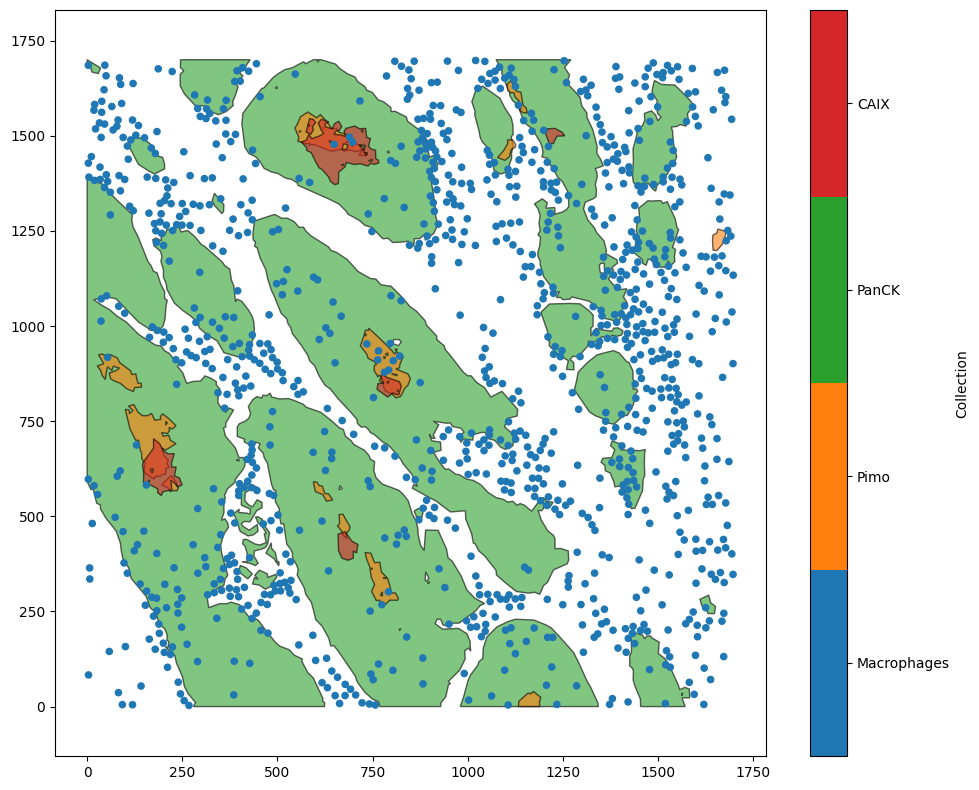

In [1]:
import muspan as ms
import matplotlib.pyplot as plt 

# Load in the example domain
example_domain = ms.datasets.load_example_domain('Macrophage-Hypoxia-ROI')

# visualise the example domain
ms.visualise.visualise(example_domain)

In this dataset, we might want to filter all Macrophages that are within 100µm of the epithelial regions. For this we'll need to set the 'property' parameter in a query to 'distance'. In particular, a general query is of the form:

some_query = ms.query.query(domain, property, relation, comparison_value)

Here, we want to use the distance syntax for property such that:

property = ('distance', ('boundary', query_objects_1, query_objects_2))

which gets the distance between the boundaries of each objects_1 and the nearest object in objects_2 (if an object is a point, the boundary is taken to be the coordinates of the point). 

For our example, this would be query_objects_1 are the Macrophage objects and objects_2 are the PanCK shapes. Alternatively, 'boundary' could be replaced with 'centroid' to compute the distance between the centroids of the objects, providing computational speed ups at the cost of geometric accuracy. Check out [queries](../../generated/muspan.query.query.html) for full documentation on the other parameters of queries.


Let's build the distance queries for our example.

In [2]:
# build queries to find macrophages and tumour cells using collections
query_macrophage = ms.query.query(example_domain, ('collection',),'is', 'Macrophages')
query_tumour = ms.query.query(example_domain, ('collection',),'is', 'PanCK')

# query all macrophages within 100 microns of tumour cells
query_mac_tumour_periphery_within_100=ms.query.query(example_domain,('distance', ('boundary', query_macrophage, query_tumour)), '<', 100)

# query all macrophages further than 100 microns of tumour cells
query_mac_tumour_periphery_outside_100=ms.query.query(example_domain,('distance', ('boundary', query_macrophage, query_tumour)), '>', 100)


Text(0.5, 1.0, 'Macros further than 100µm from Tumour boundary')

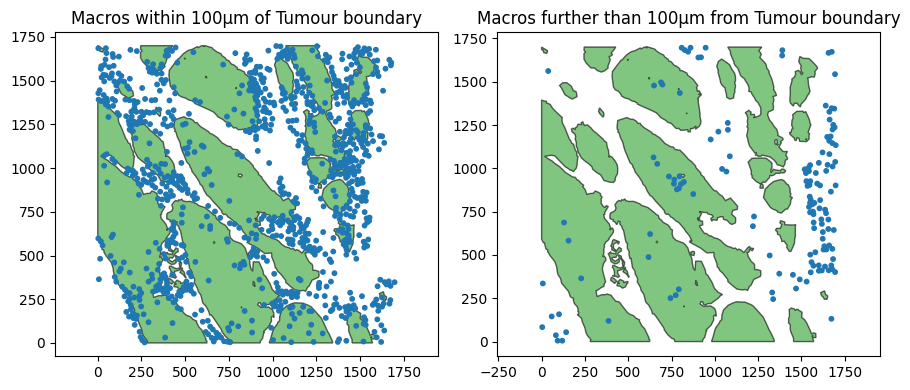

In [3]:
# plot the tumour and filtered macrophages together
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
fig.subplots_adjust(wspace=1.5)  # Increase the whitespace between the plots
ms.visualise.visualise(example_domain, objects_to_plot=query_mac_tumour_periphery_within_100, marker_size=10, ax=ax[0], add_cbar=False)
ms.visualise.visualise(example_domain,objects_to_plot=query_tumour,ax=ax[0],add_cbar=False)
ax[0].set_title('Macros within 100µm of Tumour boundary')

ms.visualise.visualise(example_domain,objects_to_plot=query_mac_tumour_periphery_outside_100,marker_size=10,ax=ax[1],add_cbar=False)
ms.visualise.visualise(example_domain,objects_to_plot=query_tumour,ax=ax[1],add_cbar=False)
ax[1].set_title('Macros further than 100µm from Tumour boundary')


Great we can see we can isolate subsets of the macrophage population to spatial restricted regions dependent on other objects in the domain.

Using our containment queries, we can go even further and filter only those macophages within 100µm of the tumour boundary that are within the tumour (infiltrating the tumour). For this we combine both a distance query with a containment query using a query container.

In [4]:
# build a query to find macrophages in tumour regions using contains
query_mac_in_tumour = ms.query.query(example_domain,('contains',(query_macrophage,  query_tumour )), 'is', True)

# query all macrophages within 100 microns of tumour cells that are also in the tumour region 
query_mac_infiltrated_periphery = ms.query.query_container(query_mac_tumour_periphery_within_100,'AND',query_mac_in_tumour,domain=example_domain)

Text(0.5, 1.0, 'Macros within 100µm of Tumour boundary (inside)')

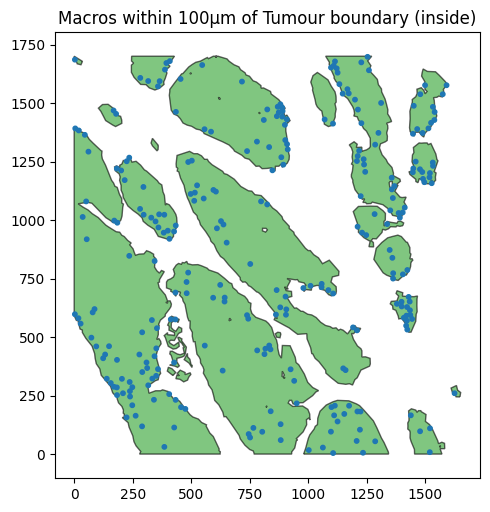

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ms.visualise.visualise(example_domain, objects_to_plot=query_mac_infiltrated_periphery, marker_size=10, ax=ax, add_cbar=False)
ms.visualise.visualise(example_domain,objects_to_plot=query_tumour,ax=ax,add_cbar=False)
ax.set_title('Macros within 100µm of Tumour boundary (inside)')


Here we have demonstrated how we can combine queries to isolate spatially-depenent populations using distances and as with all queries, distance queries can be composed with any other query using a query containers to define complex filters of our spatial data.